## Research Question 1: How does smoking affect medical costs

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
def data_processing_rename(file):
    df = pd.read_csv(file)
    df2 = df.rename(columns = {'age':'Age', 'sex':'Sex', 'bmi':'BMI', 'children':'Children', 'smoker':'Smoker', 'region':'Region', 'charges':'Medical Costs'})
    return df2

In [6]:
df = data_processing_rename("../Luis/data/Medical_Cost.csv")
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical Costs
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df_smokers = df.loc[df['Smoker'] == 'yes']
df_non_smokers = df.loc[df['Smoker'] == 'no']

Mean cost for smokers: 32050.23
Mean cost for non smokers: 8434.27


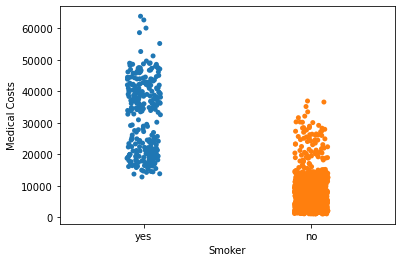

In [8]:
print("Mean cost for smokers: %.2f" % (df['Medical Costs'].loc[df['Smoker'] == 'yes'].mean()))
print("Mean cost for non smokers: %.2f" % (df['Medical Costs'].loc[df['Smoker'] == 'no'].mean()))
sns.stripplot(x = 'Smoker', y = 'Medical Costs', data = df)

*This graph is showing that the average cost of smokers is much higher overall than that of non-smokers.*

Mean cost for female smokers: 30679.00
Mean cost for male smokers: 33042.01


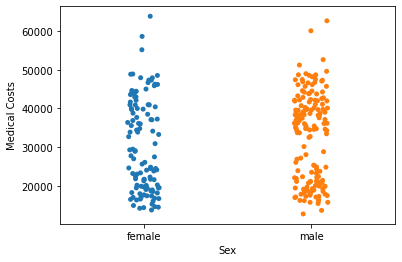

In [9]:
print("Mean cost for female smokers: %.2f" % (df_smokers['Medical Costs'].loc[df_smokers['Sex'] == 'female'].mean()))
print("Mean cost for male smokers: %.2f" % (df_smokers['Medical Costs'].loc[df_smokers['Sex'] == 'male'].mean()))
sns.stripplot(x = 'Sex', y = 'Medical Costs', data = df_smokers)

*This showed that whether they were male or female, did not make a big difference in medical costs whether they smoked or not.*  

Mean cost for female non smokers: 8762.30
Mean cost for male non smokers: 8087.20


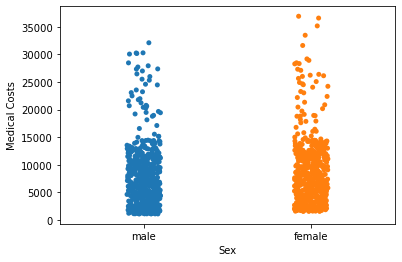

In [10]:
print("Mean cost for female non smokers: %.2f" % (df_non_smokers['Medical Costs'].loc[df_non_smokers['Sex'] == 'female'].mean()))
print("Mean cost for male non smokers: %.2f" % (df_non_smokers['Medical Costs'].loc[df_non_smokers['Sex'] == 'male'].mean()))
sns.stripplot(x = 'Sex', y = 'Medical Costs', data = df_non_smokers)

Mean cost for smokers: 32050.23
Mean cost for non smokers: 8434.27


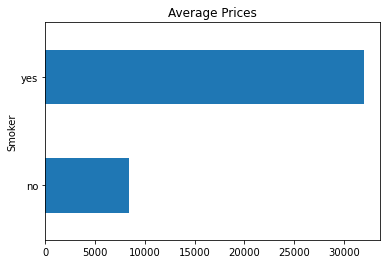

In [11]:
print("Mean cost for smokers: %.2f" % (df['Medical Costs'].loc[df['Smoker'] == 'yes'].mean()))
print("Mean cost for non smokers: %.2f" % (df['Medical Costs'].loc[df['Smoker'] == 'no'].mean()))
df_prices = df.groupby("Smoker").agg([np.mean])
buddy = df_prices['Medical Costs']
buddy
buddy.plot(kind = "barh", y = "mean", legend = False, 
            title = "Average Prices")

# This plot is showing the average medical costs for smokers compared to non smokers and i think that it shows it in a clearer way then in the graph above

*We found that the average medical cost of a smoker was 34000, and the average medical cost for a non-smoker was about 8400. Which means that it was about four times higher in smokers.*

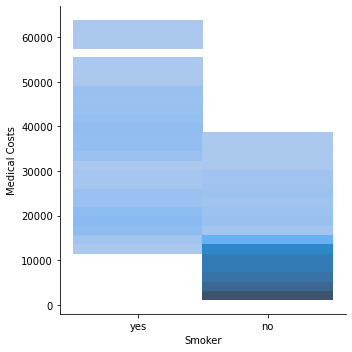

In [12]:
sns.displot(df, x = 'Smoker', y= 'Medical Costs')

#This is just showing more data when comparing smoking on charges it shows that when smoking the charges are a lot more spread out but when comparing the non-smokers the charges
# are alot more heavily weighted to the bottom with most people having charges less than 10000 dollars

*This graph is showing that the non-smokers had more weight distributed at the lower end, whereas in the smoker data it was more spread out and not heavily weighted in a certain area.*

## Conclusion for research question 1 

The data indicates that as smokers have a significantly higher medical cost then non-smokers and this seems to line up with the fact that smokers usually have more medical conditions in their life time when compared to non-smokers. 

## Research Question 2: How does age affect medical costs

AxesSubplot(0.125,0.125;0.775x0.755)


,Age,Medical Costs
Age,1.000000,0.840044
Medical Costs,0.840044,1.000000


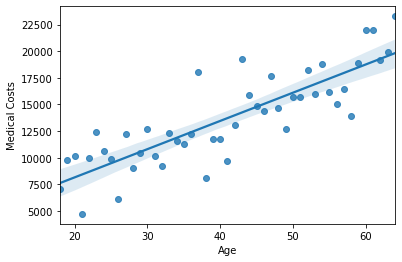

In [13]:
new_df = df.loc[:,['Age','Medical Costs']].reset_index(drop =True)
average_new_df = new_df.groupby(df['Age']).agg(np.mean)
print(sns.regplot(x="Age", y="Medical Costs", data=average_new_df))
pearson = average_new_df.corr()
pearson

*The trend line shows a clear and strong linear regression for age and medical costs. The specific pearson coefficient is 0.74 which is a really strong correlation*

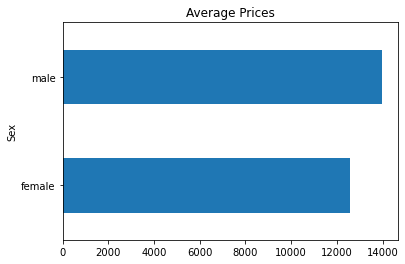

In [14]:
# I want to see how average medical cost compares between men and women
# Do to see i need the charge column and i also need the sex column 
df_sex = df.loc[:,['Sex','Medical Costs']].reset_index(drop = True)
average_df_sex = df_sex.groupby(df['Sex']).agg(np.mean)
average_df_sex.plot(kind = "barh", y = "Medical Costs", legend = False, 
           title = "Average Prices")
# This shows that males have a slightly higher medical costs then females

*Male and female representation is almost equal with around 600 for both, and the variation between male and female is most likely due just to small sample size*

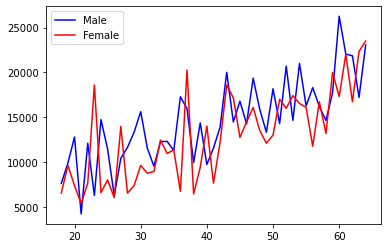

In [15]:
# I want to combine the last two plots and show the average cost per age of males and females seperately 
# I think that one way to approach this is to seperate the males and females and then get average medical costs and then plot that together 
# Getting the male data first 
new_df_male = df.loc[df['Sex'] == 'male']
new_male = new_df_male.loc[:,['Age','Medical Costs']]
average_male_df = new_male.groupby(df['Age']).agg(np.mean).drop(['Age'], axis = 1)
# Now getting the female data
new_df_female = df.loc[df['Sex'] == 'female']
new_female = new_df_female.loc[:,['Age','Medical Costs']]
average_female_df = new_female.groupby(df['Age']).agg(np.mean).drop(['Age'], axis = 1)

#average_new_df = new_df.groupby(df['Age']).agg(np.mean)
#sns.lineplot(data = average_new_df)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(average_male_df, color = 'blue', label = 'Male')
ax.plot(average_female_df, color = 'Red', label = 'Female')
ax.legend() 

# This shows that there is really not a huge difference in gender difference it appears that they both rise pretty significantly i do think that it is interesting at 42 to 44 mark in 
# females how it jumps from 7500 to 16000 and it kinda remains up there. Ald

*As we can see both male and female almost overlap every year with the differences being strictly due to the sample taken*

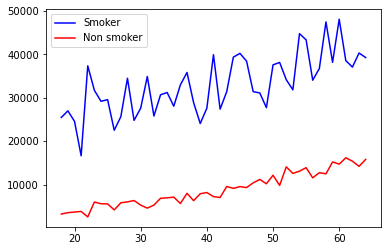

In [16]:
# I want to combine the last two plots and show the average cost per age of males and females seperately 
# I think that one way to approach this is to seperate the males and females and then get average medical costs and then plot that together 
# Getting the male data first 
new_df_smoker = df.loc[df['Smoker'] == 'yes']
new_smoker = new_df_smoker.loc[:,['Age','Medical Costs']]
average_smoker_df = new_smoker.groupby(df['Age']).agg(np.mean).drop(['Age'], axis = 1)
# Now getting the female data
new_df_non_smoker = df.loc[df['Smoker'] == 'no']
new_non_smoker = new_df_non_smoker.loc[:,['Age','Medical Costs']]
average_non_smoker_df = new_non_smoker.groupby(df['Age']).agg(np.mean).drop(['Age'], axis = 1)

#average_new_df = new_df.groupby(df['Age']).agg(np.mean)
#sns.lineplot(data = average_new_df)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(average_smoker_df, color = 'blue', label = 'Smoker')
ax.plot(average_non_smoker_df, color = 'Red', label = 'Non smoker')
ax.legend() 

# This shows that there is really not a huge difference in gender difference it appears that they both rise pretty significantly i do think that it is interesting at 42 to 44 mark in 
# females how it jumps from 7500 to 16000 and it kinda remains up there. Ald

*This graph kind of answered both questions and it shows that as age went up the average medical cost went up for smokers and non-smokers alike. Also I think the smoker line is more volatile because there were less smokers interviewed and so there data is drawing on a smaller pool for each age. So an outlier will make a bigger impact on the average then it would on the line for non-smokers.*

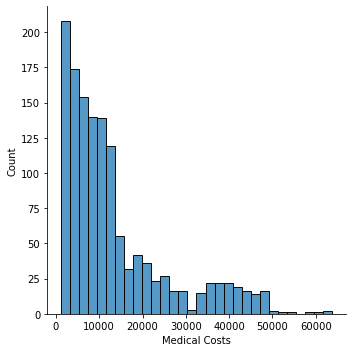

In [17]:
sns.displot(x = 'Medical Costs', data = df)
# Lower medical costs are most common

*What we can see is that most people have low medical costs, and higher amounts become increasingly rare. One assumption we can make is that this is due to how a lot of younger people were sampled (around 200 20 year olds) and as we can see costs for younger people are significantly lower than older people.*

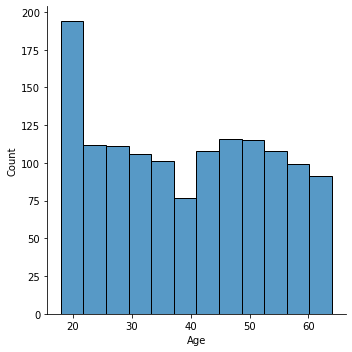

In [18]:
sns.displot(x = 'Age', data = df)

## Conclusion for research question 2

I think we clearly showed with the graphs above that as the age increases the medical costs also increase. I mean this could be due to a number of factors including older people being more likely to get hurt and to the fact that they have had more time accumulate medical costs. So this data lines up with what would be expected.